In [7]:
#!pip install customhys==1.1.6;
!pip install optproblems

In [8]:
from cProfile import label

from customhys import benchmark_func as bf
from customhys import metaheuristic as mh


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import numpy as np
import pandas as pd

### Ackley 1 
####  Domain Limits::  −35 ≤ xi ≤ 35.
- (Continuous, Differentiable, Non-separable, Scalable, Multi- modal)
- The global minima is located at origin x∗ = (0,··· ,0),
f(x∗) = 0.

In [9]:
# Name: swarm_dynamic_1
# Code:
import sys
from pathlib import Path

from customhys import benchmark_func as bf
from customhys import metaheuristic as mh
fun = bf.Ackley1(2) # This is the selected problem, the problem may vary depending on the case.
prob = fun.get_formatted_problem()

heur = [
    (  # Search operator 1
        'gravitational_search',
        {
            'gravity': 0.01,
            'alpha': 0.01
        },
        'greedy'
    ),
    (
        'local_random_walk',
        {
            'probability': 0.9,
            'scale': 1.0,
            'distribution': 'gaussian'
        },
        'probabilistic'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

# Short explanation and justification:
# We designed a metaheuristic algorithm called "swarm_dynamic_1" to find the global minimum of the Ackley function with dimension 2.
# The search operator is set to "random_flight", which is known for its good performance in multi-modal optimization problems.
# The local_random_walk operator is used as the secondary search operator to help navigate through the search space and avoid getting stuck in local optima.
# We use a greedy selector to choose the next search operator at each iteration, and a metropolis selector to decide whether to accept or reject the new solution.
# Our algorithm runs for 100 iterations and prints out the best solution found.


Search operators to employ:
gravitational_search(gravity=0.01,alpha=0.01) with greedy
local_random_walk(probability=0.9,scale=1.0,distribution='gaussian') with probabilistic
--------------------------------------------------
1
pop. radius: 1.438733412153451
x_best = [-0.95786817 -2.28483253], f_best = 7.176166691667632
2
pop. radius: 1.46441832772453
x_best = [-0.96229477 -2.28103369], f_best = 7.1504471330435315
3
pop. radius: 1.4750697044351546
x_best = [-0.96229477 -2.28103369], f_best = 7.1504471330435315
4
pop. radius: 1.4905972372268048
x_best = [-0.96229477 -2.28103369], f_best = 7.1504471330435315
5
pop. radius: 1.5851375015422953
x_best = [-0.96229477 -2.28103369], f_best = 7.1504471330435315
6
pop. radius: 1.3075663702625082
x_best = [-1.02164287 -2.26985894], f_best = 7.110885998453028
7
pop. radius: 1.2808921844753538
x_best = [-1.02164287 -2.26985894], f_best = 7.110885998453028
8
pop. radius: 1.3137727823106184
x_best = [-1.02164287 -2.26985894], f_best = 7.1108859984530

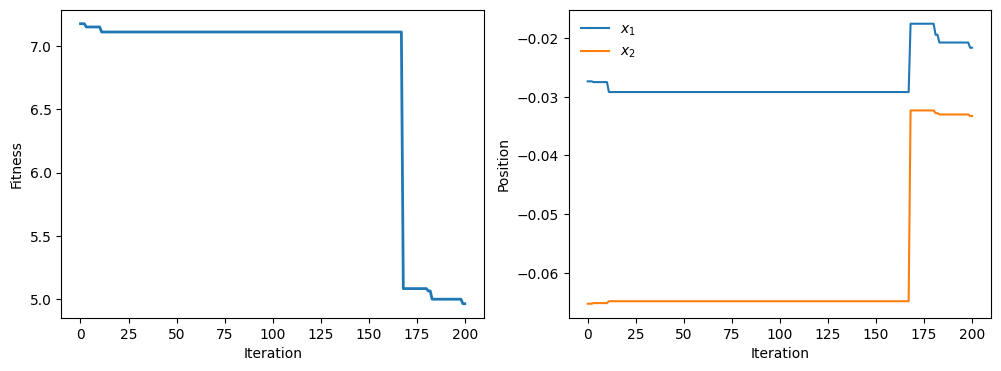

In [10]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

In [11]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=100)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

rep = 1, x_best = [-0.00067395 -0.00115485], f_best = 0.18980247126627958
rep = 2, x_best = [-0.00187775 -0.00955123], f_best = 2.431083538841289
rep = 3, x_best = [0.02609746 0.00263981], f_best = 2.8234106579755753
rep = 4, x_best = [8.67093162e-05 7.49725791e-03], f_best = 1.861290565560381
rep = 5, x_best = [0.00037905 0.00021309], f_best = 0.04920489159676933
rep = 6, x_best = [-0.02381907 -0.02040307], f_best = 4.4448233619676465
rep = 7, x_best = [-0.01454376 -0.00069725], f_best = 3.1140271333309464
rep = 8, x_best = [0.0059334  0.00333427], f_best = 1.727269778365411
rep = 9, x_best = [0.01221736 0.00380199], f_best = 3.053397540941777
rep = 10, x_best = [-0.00498207 -0.00830558], f_best = 2.54674723087426
rep = 11, x_best = [-0.03134161  0.00054059], f_best = 3.1169467239975965
rep = 12, x_best = [-0.00020966 -0.02709803], f_best = 2.581733738243617
rep = 13, x_best = [-0.01090717  0.00092995], f_best = 2.6440946639973397
rep = 14, x_best = [ 0.0022649  -0.02640395], f_best =

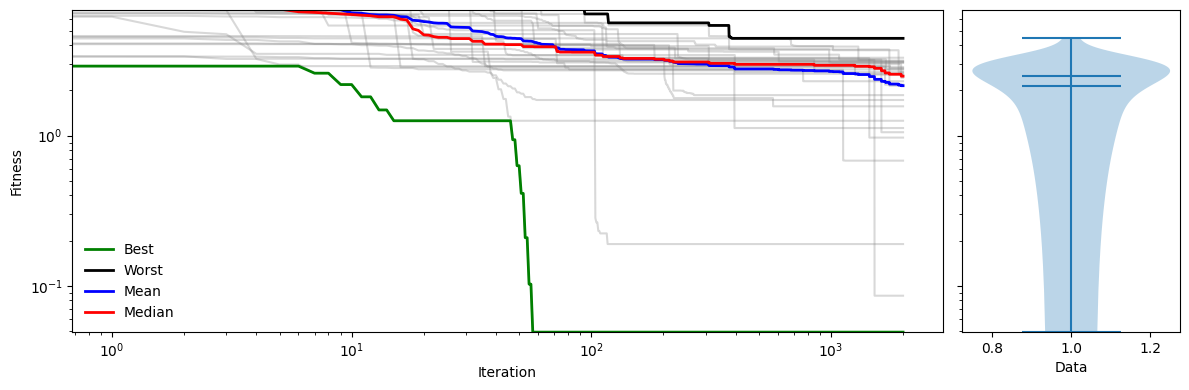

In [12]:
fitness_array = np.array(fitness).T
final_fitness = np.array([x[-1] for x in fitness_array.T])
best_fitness = np.min(fitness_array)
initial_fitness = max([x[0] for x in fitness_array])

# Now plot the fitness values
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})
axs[0].plot(fitness_array, 'grey', alpha=0.3)

axs[0].plot(np.min(fitness_array, axis=1), 'g', lw=2, label='Best')
axs[0].plot(np.max(fitness_array, axis=1), 'k', lw=2, label='Worst')
axs[0].plot(np.mean(fitness_array, axis=1), 'b', lw=2, label='Mean')
axs[0].plot(np.median(fitness_array, axis=1), 'r', lw=2, label='Median')

axs[0].set_ylabel(r'Fitness')
axs[0].set_xlabel(r'Iteration')
axs[0].set_ylim([best_fitness, initial_fitness])

# Violin plot
axs[1].violinplot(final_fitness, showmeans=True, showmedians=True)
axs[1].set_xlabel(r'Data')

axs[0].legend(frameon=False)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
plt.tight_layout()
plt.show()

In [13]:
## Metaheuristics with Dimension 2

# Name: SwarmMetaheuristic
# Code:
import sys
from pathlib import Path
 

fun = bf.Ackley1(2)   
prob = fun.get_formatted_problem()

heur = [
    (  # Search operator 1
        'swarm_dynamic',
        {
            'factor': 0.7,
            'self_conf': 2.54,
            'swarm_conf': 2.56,
            'version': 'inertial',
            'distribution': 'gaussian'
        },
        'greedy'
    ),
    (
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'all'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

# Short explanation and justification:
# This metaheuristic combines the swarm optimization of the "swarm_dynamic" operator with the local search capabilities of the "local_random_walk" operator.
# The swarm optimization helps explore the solution space, while the local search ensures that promising solutions are further explored.
# The combination of these operators is expected to result in a balanced exploration and exploitation strategy, leading to a good balance between finding promising solutions and avoiding local optima.


Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='gaussian') with greedy
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with all
--------------------------------------------------
1
pop. radius: 1.4774648449091499
x_best = [-5.72868502  2.32587958], f_best = 13.632295038233249
2
pop. radius: 1.6189960632402907
x_best = [ 3.07099309 -4.17602269], f_best = 11.145288128036617
3
pop. radius: 1.5820408768112808
x_best = [ 3.07099309 -4.17602269], f_best = 11.145288128036617
4
pop. radius: 1.6050605850563535
x_best = [ 3.07099309 -4.17602269], f_best = 11.145288128036617
5
pop. radius: 1.5777413872565185
x_best = [ 3.07099309 -4.17602269], f_best = 11.145288128036617
6
pop. radius: 1.5529447712015279
x_best = [2.90439742 0.33524296], f_best = 8.32092534855167
7
pop. radius: 1.521783164323445
x_best = [2.90439742 0.33524296], f_best = 8.32092534855167
8
pop. radius: 1.505174019194979
x_best = [2.90439742

In [14]:
## Metaheuristics with Dimension 2

## Name: SwarmMetaheuristic

import sys

fun = bf.Ackley1(2)
prob = fun.get_formatted_problem()

heur = [
    ('swarm_dynamic', {'factor': 0.7, 'self_conf': 2.54, 'swarm_conf': 2.56, 'version': 'inertial', 'distribution': 'uniform'}, 'greedy'),
    ('local_random_walk', {'probability': 0.75, 'scale': 0.5, 'distribution': 'gaussian'}, 'metropolis')
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))



Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='uniform') with greedy
local_random_walk(probability=0.75,scale=0.5,distribution='gaussian') with metropolis
--------------------------------------------------
1
pop. radius: 1.0703435483027646
x_best = [ 0.02953174 -1.89982405], f_best = 4.982149943179348
2
pop. radius: 1.433972524279358
x_best = [ 0.02953174 -1.89982405], f_best = 4.982149943179348
3
pop. radius: 1.4026990076537447
x_best = [-0.69272369 -0.96473954], f_best = 4.444845624562461
4
pop. radius: 1.4380486877687715
x_best = [-0.69272369 -0.96473954], f_best = 4.444845624562461
5
pop. radius: 1.3925676708269752
x_best = [-0.69272369 -0.96473954], f_best = 4.444845624562461
6
pop. radius: 1.2762278220547487
x_best = [-0.69272369 -0.96473954], f_best = 4.444845624562461
7
pop. radius: 1.3194089493588292
x_best = [-0.69272369 -0.96473954], f_best = 4.444845624562461
8
pop. radius: 1.361016058953232
x_best = [-0